In [1]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy
import os
import pandas as pd
import matplotlib

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Q1

In [3]:
# DATE - Absolute or relative dates or periods
# PERSON - People, including fictional
# GPE - Countries, cities, states
# LOC - Non-GPE locations, mountain ranges, bodies of water
# MONEY - Monetary values, including unit
# TIME - Times smaller than a day
# PRODUCT - Objects, vehicles, foods, etc. (not services)
# CARDINAL - Numerals that do not fall under another type
# ORDINAL - "first", "second", etc.
# QUANTITY - Measurements, as of weight or distance
# EVENT - Named hurricanes, battles, wars, sports events, etc.
# FAC - Buildings, airports, highways, bridges, etc.
# LANGUAGE - Any named language
# LAW - Named documents made into laws.
# NORP - Nationalities or religious or political groups
# PERCENT - Percentage, including "%"
# WORK_OF_ART - Titles of books, songs, etc.

In [4]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [5]:
nlp = spacy.load('en_core_web_sm')
ny_bb = url_to_string('https://www.bbc.com/news/articles/cm20k76d5xno')
article = nlp(ny_bb)
len(article.ents)

149

In [6]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'GPE': 33,
         'ORG': 28,
         'DATE': 28,
         'PERSON': 23,
         'CARDINAL': 18,
         'NORP': 10,
         'PERCENT': 3,
         'ORDINAL': 2,
         'TIME': 1,
         'PRODUCT': 1,
         'LOC': 1,
         'MONEY': 1})

In [7]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Lahore', 13), ('Pakistan', 10), ('Nasa', 4)]

In [8]:
sentences = [x for x in article.sents]

s = sentences[0]
print(s)

Lahore smog: Pollution hits record levels in Pakistan citySkip to contentBritish Broadcasting CorporationHomeNewsSportBusinessInnovationCultureArtsTravelEarthVideoLiveHomeNewsIsrael-Gaza WarWar in UkraineUS ElectionUS & CanadaUKUK PoliticsEnglandN. IrelandN. Ireland


In [9]:
displacy.render(nlp(str(s)), jupyter=True, style='ent')

In [10]:
dict([(str(x), x.label_) for x in nlp(str(s)).ents])

{'Pakistan': 'GPE',
 'Broadcasting CorporationHomeNewsSportBusinessInnovationCultureArtsTravelEarthVideoLiveHomeNewsIsrael-Gaza WarWar': 'PERSON',
 'Ireland': 'GPE'}

In [11]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

#### Some of the output includes irrelevant or unexpected content. For example, sentences[0] contains some text that does not appear in the source article, suggesting either an error in extracting sentences from article or an issue with the source data itself."

#### The full content is mostly identifying entities such as ORG, GPE, date, NORP etc correctly. Somewhere it does make errors such as identifying Schools and Lahore as PERSON.

### Q2

In [15]:
from tika import parser 

raw = parser.from_file('Alone in the Milky Way.pdf')

2024-11-18 12:35:56,620 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2024-11-18 12:36:01,644 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [16]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])

#### Data Cleaning

In [18]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower() not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]

In [19]:
filtered_word_freq = nltk.FreqDist(clean_words)
filtered_word_freq.most_common(20)

[('Earth', 27),
 ('years', 24),
 ('life', 19),
 ('stars', 18),
 ('billion', 17),
 ('planets', 15),
 ('ago', 12),
 ('planet', 12),
 ('likely', 10),
 ('cells', 10),
 ('many', 9),
 ('metals', 9),
 ('two', 8),
 ('sun', 8),
 ('galactic', 8),
 ('rocky', 8),
 ('Milky', 8),
 ('center', 8),
 ('species', 8),
 ('galaxy', 7)]

<Axes: title={'center': 'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

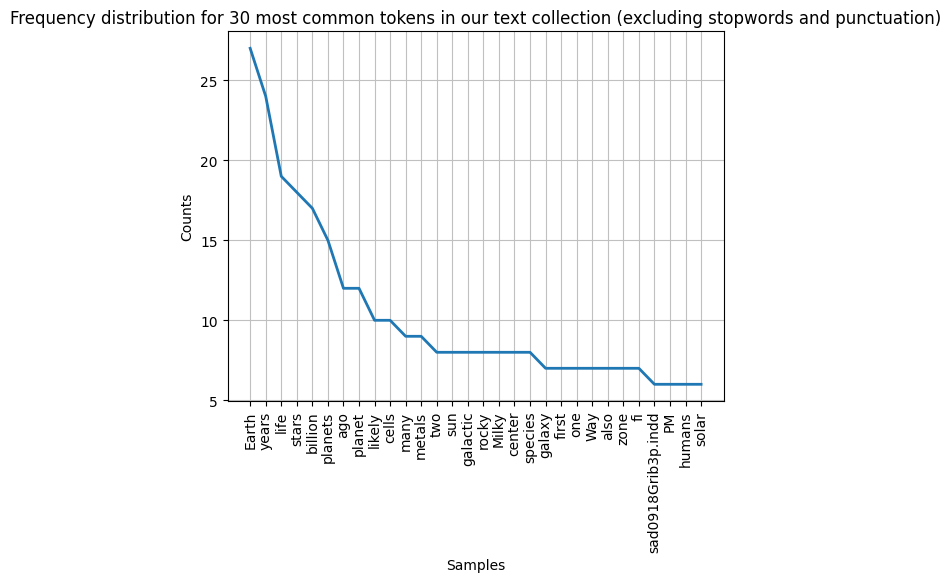

In [20]:
filtered_word_freq.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

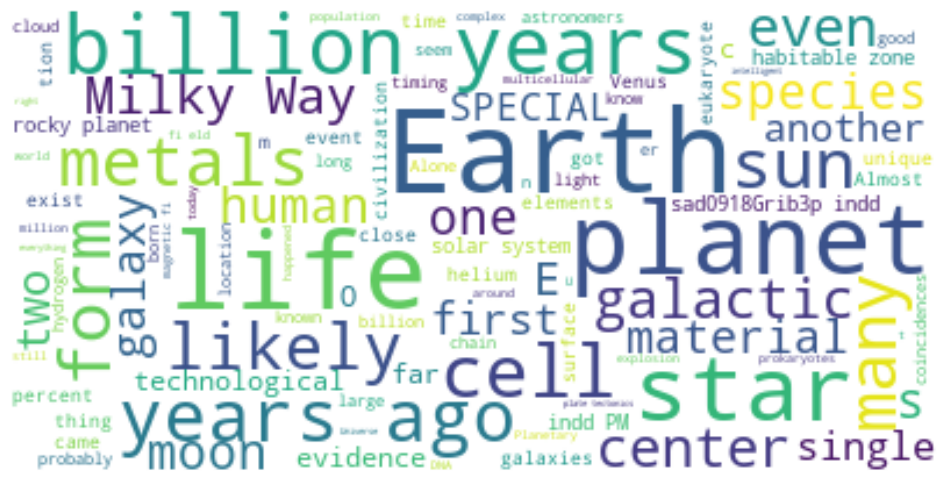

In [22]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### More Cleaning

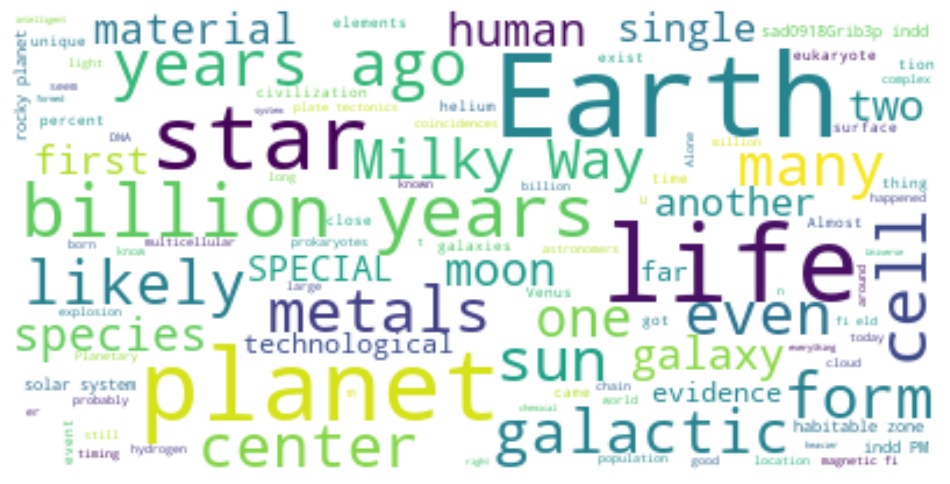

In [24]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["E", "S", "C", "O"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(raw['content'])

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Keyword Extaction

In [26]:
import yake

In [27]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)

('billion years ago', 0.00430446473822156)
('billion years', 0.0046977956564994905)
('Earth', 0.005164373419785081)
('ILLUSTR ATION', 0.0052557912028279785)
('ATION BY ARMANDO', 0.005291470545209724)
('ARMANDO VEVE', 0.005291470545209724)
('years ago', 0.009055443815504573)
('Scientific American', 0.01039225424000198)
('years', 0.010623789837345996)
('LIFE', 0.010893301785634987)
('planets', 0.013367125126519249)
('stars', 0.01417434583948549)
('billion', 0.016128703618540005)
('planet', 0.016231509082201945)
('milky', 0.021954528800991635)
('rocky planets', 0.022669903516362448)
('Venus Earth Cambrian', 0.02735623448320882)
('sun', 0.02754000818972033)
('Scientific', 0.02774673846301616)
('Earth-like planets', 0.029853390922550696)


#### The algorithm is correctly extracting keywords and calculating the most frequent words and there is no visible shortcoming.

### Q3

In [30]:
import json
import numpy as np
from textblob import TextBlob

In [31]:
#Positive +1, Negative -1

In [32]:
s = TextBlob('CS 457 is the worst course I have ever taken')
s.sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [33]:
with open('obama_tweets.txt', 'r', encoding='utf-8') as file:
    twittertext = file.read() 

In [34]:
tweets = twittertext.strip().split("\n\n")
# tweets

In [35]:
results = []
positive = 0 
negative = 0

for tweet in tweets:
    score = TextBlob(tweet).sentiment.polarity
    if score > 0:
        positive+=1
    else:
        negative+=1
    results.append(score)

df = pd.DataFrame({'tweet': tweets, 'sentiment': results})

print(df)

                                                tweet  sentiment
0   The Fourth of July is about celebrating the bi...   0.104167
1   There is absolutely no place for political vio...   0.025000
2   “The sacred cause of this country is larger th...   0.116667
3   Thanks to the skill and persistence of @POTUS,...   0.133333
4   With summer winding down, I wanted to share so...  -0.095034
5   When we launched the Voyager Scholarship at th...   0.281746
6   Today we’re excited to welcome our third cohor...   0.395833
7   On Labor Day, we celebrate the generations of ...   0.000000
8   Today we honor the memory of all those we lost...   0.225000
9   Retweet from Vice President Kamala Harris: I h...   0.275000
10  \nOne year ago, Hamas launched a horrific atta...  -0.044444
11  America is a nation of laws and a nation of im...  -0.050000
12  With summer winding down, I wanted to share so...  -0.095034
13  Thanks to the skill and persistence of @POTUS,...   0.133333
14  “The sacred cause of 

In [36]:
print(f"Positive count: {positive}")
print(f"Negative count: {negative}")

Positive count: 19
Negative count: 5


In [37]:
positive = df.query('sentiment > 0')
negative = df.query('sentiment < 0')

pos_tweet = positive.iloc[0]['tweet'] 
neg_tweet = negative.iloc[0]['tweet']

In [38]:
pos_tweet

'The Fourth of July is about celebrating the big, bold, inclusive experiment that is our American democracy. And it has always been an experiment. Our democracy has never been guaranteed, which means we can’t take it for granted. We need to keep fighting for it, keep improving it, and keep making sure it reflects the better angels of our nature instead of the worst. That, more than anything, is what America is all about.'

#### The algorithm appears to be functioning correctly, as this tweet discusses celebration and the 4th of July, which aligns well with a positive sentiment. Therefore, the positive polarity assigned to this tweet is accurate.

In [40]:
neg_tweet

'With summer winding down, I wanted to share some songs that I’ve been listening to lately – and it wouldn’t be my playlist if it didn’t include an eclectic mix. I hope you find something new to listen to!'

#### The algorithm is completely inaccurate in this case, as there is no negative sentiment in the tweet. It simply offers recommendations for songs, making the assigned negative polarity incorrect.

### Q4

In [43]:
reviews = pd.read_csv('hotel.csv')

In [44]:
reviews.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [45]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [46]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

In [47]:
def clean_more_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2   
  
def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",str(text))
  # text=re.sub("(\\d|\\W)+"," ",str(text))
  text = re.sub("(\\W)+", " ", str(text))
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if clean_more_txt(word)]
  clean_text2 = [word for word in clean_text if clean_more_txt(word)]
  return " ".join(clean_text2)

In [48]:
reviews['clean_text'] = reviews['reviews.text'].apply(clean_txt)

In [49]:
reviews.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince,clean_text
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN,pleasant min walk along sea front water bus re...
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN,really lovely hotel stay top floor surprise ja...
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN,ett mycket bra hotell det som drog ner betyget...
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN,stay four nights october hotel staff welcome f...
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN,stay four nights october hotel staff welcome f...


### Using TF-IDF Method

In [51]:
#initializing tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_jobid = tfidf_vectorizer.fit_transform((reviews['clean_text'])) #fitting and transforming the vector
tfidf_jobid

<35912x28034 sparse matrix of type '<class 'numpy.float64'>'
	with 768187 stored elements in Compressed Sparse Row format>

In [52]:
print(tfidf_jobid[0,:])

  (0, 18796)	0.1700562136824885
  (0, 15844)	0.23481616924329896
  (0, 26943)	0.13556935994993993
  (0, 1512)	0.21351191829164767
  (0, 21793)	0.26052980679484
  (0, 10223)	0.12869824697586657
  (0, 27041)	0.1641838651913206
  (0, 4082)	0.2257785360988456
  (0, 20794)	0.1538307195755713
  (0, 8900)	0.1909934085625173
  (0, 12067)	0.07490158590213274
  (0, 5418)	0.11267727225306336
  (0, 3785)	0.09424582962826011
  (0, 10927)	0.10298460942432554
  (0, 19879)	0.17959244130413451
  (0, 26284)	0.21977465551851208
  (0, 21182)	0.06456727776240168
  (0, 1312)	0.34906040795752985
  (0, 7234)	0.14051037976109246
  (0, 27510)	0.13587905591871566
  (0, 27167)	0.13072974600884535
  (0, 24197)	0.1443798033667648
  (0, 16241)	0.38544616933582504
  (0, 20628)	0.40048768306061194


In [53]:
reviews.shape

(35912, 20)

In [54]:
query = reviews.iloc[[0]]

In [55]:
query

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince,clean_text
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN,pleasant min walk along sea front water bus re...


In [56]:
query = 'Looking for a hotel that has clean and comfortable rooms and friendly and helpful staff.'

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

#convert query input to TF-IDF
user_tfidf = tfidf_vectorizer.transform([query])

#Calculate similarity score of query data with every record in the original data
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_jobid)

In [58]:
output2 = list(cos_similarity_tfidf)

In [59]:
def get_recommendation(top, reviews, scores):
  recommendation = pd.DataFrame(columns = ['name', 'clean_text', 'score'])
  count = 0
  for i in top:
      recommendation.at[count, 'name'] = reviews['name'][i]
      recommendation.at[count, 'clean_text'] = reviews['clean_text'][i]
      recommendation.at[count, 'score'] =  scores[count]
      count += 1
  return recommendation

In [60]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
results = get_recommendation(top,reviews, list_scores)

In [61]:
results

,name,clean_text,score
0,Quality Inn Johnson City,room comfortable clean staff friendly helpful,0.919003
1,Quality Inn and Suites Big Rapids,staff friendly helpful room clean comfortable,0.919003
2,Quality Inn Gulfport,staff friendly helpful room clean comfortable,0.919003
3,Towneplace Suites Albany University Area,clean comfortable hotel staff friendly,0.856986
4,"The Alexandrian, Autograph Collection",friendly helpful staff comfortable room,0.850278
5,Americas Best Value Inn,clean comfortable helpful staff,0.848395
6,Country Inn and Suites By Carlson Corbin,hotel staff friendly helpful,0.818366
7,Candlewood Suites Eugene Springfield,clean hotel helpful staff comfortable bed,0.809468
8,Holiday Inn Fond Du Lac,comfortable nice helpful friendly staff,0.808177
9,Comfort Inn Deland - Near University,great breakfast clean comfortable room friendl...,0.807856


### Using Word2Vec Deep Learning

In [63]:
import sys
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

import warnings 
warnings.filterwarnings('ignore') # no warnings

In [64]:
corpus = []
for words in reviews['clean_text']:
    corpus.append(words.split())

In [65]:
documents = [TaggedDocument(doc, [str(reviews['name'][i])]) for i, doc in enumerate(corpus)]

In [66]:
max_epochs = 5
vec_size = 15
alpha = 0.025

dl_model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1,
                epochs=max_epochs)
  
dl_model.build_vocab(documents)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    dl_model.train(documents,
                total_examples=dl_model.corpus_count,
                epochs=dl_model.epochs)
    # decrease the learning rate
    dl_model.alpha -= 0.0002
    # fix the learning rate, no decay
    dl_model.min_alpha = dl_model.alpha

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4


### Tex Document/Record/Row representation in numerical feature

In [68]:
# row 1 in the data
reviews['clean_text'][0]

'pleasant min walk along sea front water bus restaurants etc hotel comfortable breakfast good quite variety room aircon didnt work well take mosquito repelant'

In [69]:
# row 1 in the data
dl_model[0]

array([ 0.5440167 ,  0.36779833,  0.5193743 ,  1.7802236 ,  0.8032776 ,
       -0.9336745 , -0.22756667,  0.22705291, -2.0002708 , -0.34773213,
        2.0104346 , -0.2888072 , -0.5812132 ,  0.9355232 , -0.4086855 ],
      dtype=float32)

In [70]:
dl_model.wv.most_similar('clean',topn=10)

[('tidy', 0.8969157934188843),
 ('neat', 0.8940140008926392),
 ('spacious', 0.8592882752418518),
 ('weich', 0.8568331003189087),
 ('comfortable', 0.8465582132339478),
 ('comfy', 0.8407546877861023),
 ('exclusivo', 0.838720977306366),
 ('spotless', 0.8384687900543213),
 ('spotlessly', 0.8314220905303955),
 ('masculine', 0.8296285271644592)]

In [71]:
dl_model.save("reviews_doc2vec.model")

### Testing Word2Vec Model

In [73]:
query = reviews['clean_text'][0]
query

'pleasant min walk along sea front water bus restaurants etc hotel comfortable breakfast good quite variety room aircon didnt work well take mosquito repelant'

In [74]:
query_data_tokenize = word_tokenize(query)
v1 = dl_model.infer_vector(query_data_tokenize)
similar_records=dl_model.dv.most_similar([v1])

In [75]:
similar_records

[('H��tel Marinca and Spa', 0.8816561102867126),
 ('Grandison Bed Breakfast', 0.8679395318031311),
 ('School House Motel', 0.8523160219192505),
 ('Hampton Inn', 0.8519083261489868),
 ('Midvalley Motel', 0.8385701775550842),
 ('Fairfield Inn/suites-marriott', 0.8355016708374023),
 ('The Merritt Center and Lodge', 0.8316745162010193),
 ('Port-o-call Motel', 0.8307711482048035),
 ('Hampton Inn Waco', 0.8249081969261169),
 ('Rodeway Inn Airport', 0.8169689774513245)]

In [76]:
import pandas as pd

all_idx = []

for i in range(len(similar_records)):
    idx = reviews[reviews['name'] == similar_records[i][0]].copy()
    idx['score'] = similar_records[i][1]
    all_idx.append(idx)
    
final_df = pd.concat(all_idx, ignore_index=True)
final_df[['name', 'score', 'clean_text']]


,name,score,clean_text
0,H��tel Marinca and Spa,0.881656,sjour sjour qui nous permis nous reposer dans ...
1,H��tel Marinca and Spa,0.881656,smsta hotellet jag varit otrevlig personal ver...
2,H��tel Marinca and Spa,0.881656,smsta hotellet jag varit otrevlig personal ver...
3,H��tel Marinca and Spa,0.881656,chambre avec des fourmis mme aprs nettoyage li...
4,H��tel Marinca and Spa,0.881656,personnel aux petits soins pour ses clients ch...
5,H��tel Marinca and Spa,0.881656,superbe endroit mais chambre rserve ntait pas ...
6,H��tel Marinca and Spa,0.881656,htel formidable personnel attentif souriant co...
7,H��tel Marinca and Spa,0.881656,sjour idyllique inoubliable personnel est extr...
8,Grandison Bed Breakfast,0.867940,excellent areas beautifully appoint addition b...
9,School House Motel,0.852316,share opinion businesswith visitors across uni...


#### I prefer the TF-IDF method because its output appears more accurate, and the recommendations align better with the query. The output of Word2Vec does not make much sense.